# 1. Descripción del problema

El problema a tratar por este algoritmo es el **problema de selección**, que consiste en encontrar un elemento $x$ dentro de un arreglo de números $A$ no necesariamente ordenado. Este elemento cumple la condición de ser mayor a una cantidad $i$ de elementos dentro del arreglo y es conocido como el **Estadístico de orden i-ésimo de A**.

El concepto de **Estadísticos de orden**, hace referencia específicamente a un elemento mayor a una cierta cantidad de números dentro de una muestra. Estos cumplen un rol muy importante para la estadística no paramétrica y de inferencia.

**Entrada:** Conjunto de *n* números diferentes de la forma $[a_1,a_2,...,a_n]$ y un índice $i$.

**Salida**: Un número $x$ el cual cumple la condición de ser mayor a una cantidad $i-1$ de elementos dentro dentro del conjunto.

**Tamaño del problema:** El tamaño para este problema viende definido por el tamaño de la muestra $A$ a analizar.


<a href="https://imgur.com/NfHdgc4"><img src="https://i.imgur.com/NfHdgc4.jpg" title="source: imgur.com" /></a>


# 2. Algoritmo Select


## 2.1 Código

In [10]:
Contador1 = 0 #Contador para comparaciones dentro de pivot selection

def insertionSort(array):
	global Contador1

	for i in range (1,len(array)): #Ciclo más grande, es el que realiza cada paso del algoritmo
		key = array[i] #Se guarda número a ubicar
		j = i-1

		while 1:
			Contador1 += 1
			if j >= 0 and key < array[j]:
        #Si el número es mayor al de su izquierda, se intercambian de posición entre ellos
				array[j+1] = array[j]
				array[j] = key
				j-=1 #Se modifica variable j para seguir recorriendo el arreglo hacia la izquierda hasta llegar a la posición 0
			else:
				break #De no ser necesario una permutación, se sigue avanzando para el siguiente número

def mediana(A, l, n):  #Algortimo para encontrar medianas usando Insertion Sort
	aux = []

	for i in range (l, l+n):
		aux.append(A[i])
	
	insertionSort(aux)

	return aux[n // 2]


def pivotSelection(A, l, r):

	# Cantidad de elementos dentro del arreglo
	n = r - l + 1
 
	medianas = []  #arreglo auxiliar para guardar medianas
 
	i = 0
	while (i < n // 5):  #Se divide el arreglo en grupos de 5 y se guardan las medianas en arreglo auxiliar
		medianas.append(mediana(A, l + i * 5, 5))
		i += 1
 
	if (i * 5 < n):
		medianas.append(mediana(A, l + i * 5, n % 5))
		i += 1
 
	if len(medianas) == 1:   #Si el arreglo auxiliar solo tiene un elemento, se ha encontrado la mediana y se retorna
		medOfMed = medianas[0]
	else:
		medOfMed = pivotSelection(medianas, 0, i - 1) #En caso de no encontrar aún la mediana, se aplica recursividad en arreglo auxiliar

	return medOfMed  #Se retorna la mediana de las medianas

def partition(l, r, A, pivot):
	for i in range(l, r):
		if A[i] == pivot:
			A[i], A[r] = A[r], A[i]
			break
 
	ptr = l
	for i in range(l, r):
		if A[i] <= pivot:
				A[i], A[ptr] = A[ptr], A[i]
				ptr += 1
	A[ptr], A[r] = A[r], A[ptr]
	return ptr

def select(A, l, r, i, verbose):
	if(i > 0 and l != r and i-1 <= r): #Se comprueba si el índice a buscar se encuentra dentro del arreglo y es válido
		pivot = pivotSelection(A, l, r)
	
		if verbose == True:
			print("Pivote seleccionado para la partición: " + "\033[92m" + str(pivot))
			print("\033[0m")

		pi = partition(l, r, A, pivot)
	
		if verbose == True:
			print("PARTICIÓN REALIZADA\n " + "\033[34m" + "COLOR AZUL: VALORES MENORES " + "\033[33m" + "COLOR AMARILLO: VALORES MAYORES")
			print("\033[0m")
			print("[", end = '')
	 
			if(r != l):
				print("\033[34m", end = '')
			else:
				print("\033[0m", end = '')
			
			for j in range(l, pi):
				print(str(A[j]) + ", ", end = '')
		
			print("\033[0m", end = '')
	 
			if pi == r:
				print(str(A[pi]), end = '')
			else:
				print(str(A[pi]) + ", ", end = '')
				print("\033[33m", end = '')

			for j in range(pi+1, r+1):
				if j == r:
					print(str(A[j]), end = '')
				else:
					print(str(A[j]) + ", ", end = '')
		 
			print("\033[0m", end = '')
			print("]\n")

		if(i-1 < pi):
			if verbose == True:
				print(str(i) + " es menor a la posición del pivote " + "(" + str(pi+1) + ")" + " se sigue con la mitad izquierda\n")
			return select(A, l, pi - 1, i, verbose)
		if(i-1 == pi):
			if verbose == True:
				print(str(i) + " es igual a la posición del pivote " + "(" + str(pi+1) + ")" + " se retorna el elemento en la posición " + str(pi+1))
			return A[pi]
		if verbose == True:
				print(str(i) + " es mayor a la posición del pivote " + "(" + str(pi+1) + ")" + " se sigue con la mitad derecha\n") 
		return select(A, pi + 1, r, i, verbose)
	if (l == r):
		return A[0]
	return
#Ejemplo
A = [12, 3, 2, 9, 17, 0, 21, 7, 5, 4, 8, 11, 6, 15, 1]
i = 1
k = 0
verbose = False

print("Entrada: ", A, "índice a buscar: ", i)
 
Contador1 = 0 #Contador de llamadas recursivas
Contador2 = 0 #Contador de comparaciones

k = select(A, 0, len(A)-1, i, verbose)

if verbose == True:
	print("\nSalida: " + "\033[92m" + str(k) + "\033[0m" + " contador de comparaciones: " + "\033[92m" + str(Contador1) + "\033[0m")
else:
	print("Salida: ", k, "contador de comparaciones: ", Contador1)

Entrada:  [12, 3, 2, 9, 17, 0, 21, 7, 5, 4, 8, 11, 6, 15, 1] índice a buscar:  1
Salida:  0 contador de comparaciones:  54


## 2.2 Descripción



El algoritmo de Select consiste en encontrar la posición i-ésima correspondiente al estadístco de orden que se está buscando mediante la realización de particiones recursivas al arreglo de entrada, alrededor de un pivote determinado. Este proceso de particiones es idéntico al utilizado en algoritmos como QuickSort, en el cual los elementos del arreglo son ordenados alrededor de un número llamado **pivote**. Así, el resto de elementos son ubicados a la izquierda del pivote si son menores a este, o a la derecha si es que son mayores.

**Entrada:** Un arreglo o lista con $n$ cantidad de números, además de un índice $i$.

**Salida:** Un elemento con una ubicación q-ésima en el arreglo, cuya posición coincide con el índice $i$ dado.

Como se mencionó anteriormente, este algoritmo repite el funcionamiento de el algoritmo QuickSort para realizar el método **partition**. La diferencia de Select con respecto a este algoritmo, es la forma en que se determina el pivote. Este algoritmo hace uso de la función llamada **pivot-seleccion**, la cual busca generar particiones lo más balanceadas posibles, mediante la búsqueda de un pivote que se acerque lo más posible a la mediana real del conjunto. Para conseguir esto esta función realiza los siguientes pasos.

1. Se divide el arreglo de $n$ elementos en una cantidad $n/5$ de sub-arreglos que contengan $5$ elementos cada uno. Existe la posibilidad que el último sub-arreglo pueda tener menos de la cantidad mencionada.

2. Ordena cada sub-arreglo utilizando Insertion Sort  y busca la mediana de cada uno de ellos. Estas medianas se guardan simultáneamente en un arreglo auxiliar.

3. Se aplica el mismo algoritmo **Pivot Selection** recursivamente sobre el arreglo de medianas hasta que su tamaño sea de 1 elemento. Este será por consecuencia la mediana del arreglo original.

Luego de aplicar esta función, el algoritmo select procede a comparar el índice $i$ que se está buscando, con la posición en la cual quedó el pivote luego de la función **Pivot Selection**, ante lo cual se desprederán estas 3 nuevas opciones:

1. En caso de que $i$ sea igual a la posición del pivote, se retorna el elemento que se encuentre en esta posición.

2. En caso de que $i$ sea mayor a la posición del pivote, se aplicará recursivamente el algoritmo Select a la mitad derecha del arreglo, que contiene a los valores mayores al pivote.

3. En caso de que $i$ sea menor a la posición del pivote, se aplicará recursivamente este algoritmo a la mitad izquierda del arreglo, en la cual están los números menores al pivote.

## 2.3 Ejemplo

En la siguiente imagen se iluistrará y luego se explicará un ejemplo del uso del algoritmo Select para el arreglo `A = [12, 3, 2, 9, 17, 0, 21, 7, 5, 4, 8, 11, 6, 15, 1]`, en el cual se buscará el mínimo elemento, es decir, el estadístico de orden $1$, el cual por propiedad es mayor a exactamente $1-1 = 0$ elementos.

<a href="https://imgur.com/qS2uPZ5"><img src="https://i.imgur.com/qS2uPZ5.jpg" title="source: imgur.com" /></a>

A lo largo de la ilustración se observa paso a paso el funcionamiento del algoritmo, distribuido en 3 pasos principales que consisten en las tres llamadas a partition que se realizan para este ejemplo, junto con los pivotes que son seleccionados por **Pivot Selection** después de cada partición.

Tamibién se indica con cuál mitad se continuará trabajando para encontrar el índice $i$, hasta que finalmente se llega a un arreglo de un elemento que trivialment corresponde al mínimo valor del arreglo de entrada.

## 2.4 Ejecución del código con opción verbose

In [4]:
import random

A = random.sample(range(1, 100), 15)
i = random.randint(1,15)
verbose = True

if(verbose == True):
	print("Entrada: " + "\033[92m" + str(A) + "\033[0m" + " Índice a buscar: " + "\033[92m" + str(i))
	print("\033[0m")
else:
	print("Entrada: ", A)

Contador1 = 0

k = select(A, 0, len(A)-1, i, verbose)

if(verbose == True):
	print("\nSalida: " + "\033[92m" + str(k) + "\033[0m" + " Cantidad de comparaciones: " + str(Contador1))
	print("\033[0m")

Entrada: [66, 62, 56, 13, 11, 31, 20, 40, 93, 23, 59, 68, 19, 44, 12] Índice a buscar: 5

Pivote seleccionado para la partición: 44

PARTICIÓN REALIZADA
 COLOR AZUL: VALORES MENORES COLOR AMARILLO: VALORES MAYORES

[13, 11, 31, 20, 40, 23, 19, 12, 44, 56, 59, 68, 66, 62, 93]

5 es menor a la posición del pivote (9) se sigue con la mitad izquierda

Pivote seleccionado para la partición: 20

PARTICIÓN REALIZADA
 COLOR AZUL: VALORES MENORES COLOR AMARILLO: VALORES MAYORES

[13, 11, 12, 19, 20, 23, 31, 40]

5 es igual a la posición del pivote (5) se retorna el elemento en la posición 5

Salida: 20 Cantidad de comparaciones: 51



Las impresiones en caso de que la opción verbose esté activada ilustran lo que va sucediendo con el arreglo luego de reorganizarlo con la función partition.

Se describe también a cual mitad se e aplicará nuevamente el algoritmo Select para una nueva partición hasta que el pivote seleccionado coincide con el valor buscado.

# 3. Propidades del algoritmo

## 3.1Tiempo de ejecución

Para el tiempo de ejecución de este algoritmo, se debe analizar el comportamiento de este paso a paso.

Tenemos que para el primer paso, el cual consiste en dividir el arreglo, su complejidad corresponde a $O(n)$, debido a que se recorre el arreglo completo para realizar este paso.

Para el segundo, el cual consisite en encontrar las medianas, tenemos que Insertion Sort se aplica para arreglos de un tamaño constante $O(1$, con lo cual su tiempo de ejecución es de $O(n)$.

En el paso tres, tarda un tiempo $T(n/5)$ debido a que se aplica recursivamente el algoritmo Select sobre el arreglo de medianas del cual el tamaño se sabe que es $n/5$.

Para el paso cuatro, en el cual es aplicada la función partition, la cual toma un tiempo de ejecución de $O(n)$ debido a que consta solamente de recorrer el arreglo original y distribuir cada elemento alrededor del pivote.

Finalmente, en el paso cinco, tenemos que las posibilidades son encontrar el índice indicado, o aplicar recursivamente el algoritmo a alguna de las mitades menores o mayores que $k$. Lo cual representa aplicar el algoritmo a lo más a una cantidad $7n \above 1pt 10$ $+6$ de elementos.

Es importante recalcar que es necesario definir una constante la cual delimita que para una cantidad $n>c$, el algoritmo funcionará en un tiempo lineal $O(1)$, debido al tiempo de ejecución marcado para este último paso.

Con lo cual tenemos la siguiente función de recurrencia:

\begin{equation}
T(n) = \begin{cases}
  O(1)  & N < 140 \\
  T([n/5]) + T(7n/10 + 6)  + O(n) & N \leq 140
\end{cases}
\end{equation}

Para el caso 2, se realiza la resolución de la función de recurrencia mediante substitución, en el cual se probará la relación $T(n) \leq cn$.

\begin{equation}
T(n) \leq cn/5 + c(7n/10 + 6) + O(n)
\end{equation}
\begin{equation}
T(n) \leq cn/5 + c + 7cn/10 + 6c + O(n)
\end{equation}
\begin{equation}
T(n) \leq 9cn/10 + 7c + O(n)
\end{equation}
\begin{equation}
T(n) \leq cn
\end{equation}

Esta resolución se consigue eligiendo un valor a $c \geq 140$, según se indica en la relación anterior.

Finalmente tenemos que el tiempo de ejecución para el algoritmo Select es de $O(n)$.

## 3.2 Correctitud

### **3.2.1 Teorema  de correctitud de algoritmo Select**

El algoritmo Select, dado un arreglo del orden $[a_1,a_2, \ldots ,a_n]$, y un índice $i$ tal que $1 \leq i \leq n$, retorna correctamente un elemento en una posición $i$-ésima perteneciente al arreglo de entrada, el cual cumple la condición de ser mayor a una cantidad $i-1$ de elementos. Es decir $[a_1, a_2, \ldots \leq a_i]$ 

### **Prueba del teorema**

Debido a que este es un algoritmo recursivo, para la prueba de este teorema se hará uso del método de inducción matemática, el cual consiste en demostrar que una propoisición $P(n)$ se cumple para todos los números $n$. Para esto se deben aplicar los siguientes puntos:

1. Probar que $P(n)$ se cumple para un caso base.
2. Probar que si $P(k)$ es verdadera, entonces también se cumple para $P(k+1)$

### **Caso base**

El caso base es para cuando $n=1$, es decir Select se aplica para un arreglo con tan solo un elemento, en este caso, el único índice posible a solicitar es el índice $1$. Para este caso algoritmo retorna el único elemento ubicado en la primera posición del arreglo, el cual cumple la propiedad de ser mayor a $1-1=0$ elementos.

### **Paso inductivo**

Para este caso se asume que el algoritmo select se cumple para todos los elementos menores o iguales a $n$. 

Luego se observa que para una entrada $n+1$, luego de la función partition se generan dos sub-arreglos además de un pivote en una posición intermedia $k$, en torno a la cual se reorganizarán los números ubicando los menores a la izquierda de este y los mayores a la derecha. En caso de ser $k$ igual al índice $i$ se retorna el elemento $a_k$ y corresponde a un elemento mayor a una cantidad $i - 1$ de valores del arreglo. 

Después de esto, si $i < k$, se continuará aplicando el algoritmo Select en el conjunto a la izquierda del pivote, donde se encuentran los valores menores a este. En caso contrario, donde $i > k$, se aplicará el algoritmo Select al conjunto ubicado a la derecha del pivote, donde se ubican los valores mayores. 

Estos sub-arreglos previamente mencionados son de tamaño menor o igual a $n+1$ y por consecuencia menor o igual a $n$, por lo cual debido a la suposición inicial del teorema, el algoritmo Select funcionará correctamente.


# 4. Experimentos

In [21]:
#Código extraído de https://www.geeksforgeeks.org/quickselect-algorithm/
#Para este caso, la función partition no recibe un pivote en específico sino que realiza el reordenamiento
#alrededor del elemento ubicado en la última posición del arreglo, independiente de cuál sea este.

def partition2(arr, l, r):
      
    x = arr[r]
    i = l
    for j in range(l, r):
          
        if arr[j] <= x:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
              
    arr[i], arr[r] = arr[r], arr[i]
    return i
  
# finds the kth position (of the sorted array) 
# in a given unsorted array i.e this function 
# can be used to find both kth largest and 
# kth smallest element in the array. 
# ASSUMPTION: all elements in arr[] are distinct
def kthSmallest(arr, l, r, k):
  
    # if k is smaller than number of
    # elements in array
    if (k > 0 and k <= r - l + 1):
  
        # Partition the array around last
        # element and get position of pivot
        # element in sorted array
        index = partition2(arr, l, r)
  
        # if position is same as k
        if (index - l == k - 1):
            return arr[index]
  
        # If position is more, recur 
        # for left subarray 
        if (index - l > k - 1):
            return kthSmallest(arr, l, index - 1, k)
  
        # Else recur for right subarray 
        return kthSmallest(arr, index + 1, r, 
                            k - index + l - 1)
    print("Index out of bound")
  
# Driver Code
arr = [ 10, 4, 5, 8, 6, 11, 26 ]
n = len(arr)
k = 3
print("Entrada: ", arr)
print("K-th smallest element is ", end = "")
print(kthSmallest(arr, 0, n - 1, k))
  
# This code is contributed by Muskan Kalra.

Entrada:  [10, 4, 5, 8, 6, 11, 26]
K-th smallest element is 6


## 4.1 Relación mejor-peor caso

El mejor caso para este algoritmo es demorarse un tiempo lineal $O(n)$, a comparación del peor caso en el cual el tiempo sería cuadrático del orden $O(n^2)$. Esto dependerá de la relación entre qué tan separados estén el pivote y el índice $i$ a buscar.

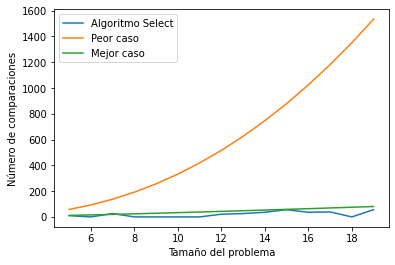

In [6]:
import matplotlib.pyplot as plt
import math

x=[n for n in range(5,20)] 
y1=[(n*n * math.log2(n)) for n in range(5,20)] # worst case
y2=[(n * math.log2(n)) for n in range(5,20)] # best case
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  i = random.randint(1,20)
  Contador1 = 0

  k = select(a, 0, len(a)-1, i, verbose = False)
  y.append(Contador1)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Algoritmo Select", "Peor caso", "Mejor caso"])

plt.xlabel('Tamaño del problema')
plt.ylabel('Número de comparaciones')
plt.show()

### Análisis de resultados

Podemos observar la gran diferenciaa entre la cantidad de comparaciones para el mejor y peor caso teórico, cumpliendose sus distribuciones planteadas. Además de cómo el algoritmo Select tiende a estar más cerca del rendimiento del mejor caso, a pesar de contar con algunas fluctuaciones.

## 4.2 Comparación con Randomized-Select

La variante de este algoritmo es el randomized-select, el cual difiere en la selección del pivote para generar la partición, en vez de seleccionar un pivote mediante el algoritmo Pivot Selection, este se define de una manera aleatoria.

A continuación se grafica la diferencia de rendimiento entre las variantes.

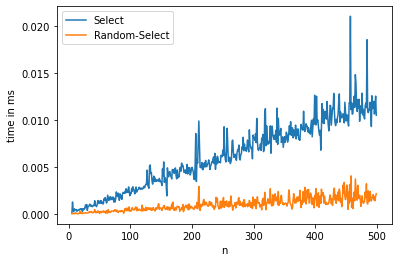

In [22]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x = []; y1 = [] ; y2 = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  i = random.randint(1,n)
  verbose = False

  #la función repeat está ejecutando 20 veces InsertionSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import select", stmt=f"select({a}, {0}, {len(a)-1}, {i}, {verbose})", repeat=1, number=10)

  k = repeat(setup="from __main__ import kthSmallest", stmt=f"kthSmallest({a}, {0}, {len(a)-1}, {i})", repeat=1, number=10)

  x.append(n)
  y1.append(t)
  y2.append(k)


plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "Random-Select"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

En la gráfica se puede apreciar los dos rendimientos según la variante a utilizar. 

A diferencia de lo que se pudiese suponer, el algoritmo Select tiene un rendimiento promedio peor a la selección aleatoria de pivotes, esto puede deberse al tiempo extra que toma la función Pivot Selection, la cual como se observa, para tamaños grandes de elementos, tiende a ser costosa en tiempo de ejecución.